In [45]:
using Plots, Measurements, LsqFit

In [46]:
# Define a struct with fields hours, minutes, and seconds
struct Time
    h::Int64 # Hours
    m::Int64 # Minutes
    s::Float64 # Seconds
end

In [47]:
"""
Converts a `Time` object to seconds.

# Arguments
- `t::Time`: A `Time` object with fields `h`, `m`, and `s`.

# Returns
- `Float64`: The total number of seconds represented by the `Time` object.
"""
function time_to_seconds(t::Time)
    return t.h * 3600 + t.m * 60 + t.s
end

time_to_seconds

In [48]:
# Define the measurements as tuples of time and position
measurements_eq = [
    (Time(13, 26, 40), 2.7),
    (Time(13, 27, 7), 1.1),
    (Time(13, 28, 0), 0.0),
    (Time(13, 28, 54), 1.2),
    (Time(13, 29, 36), 3.1),
    (Time(13, 30, 5), 4.7),
    (Time(13, 30, 30), 6.2),
    (Time(13, 31, 3), 8.2),
    (Time(13, 32, 6), 11.1),
    (Time(13, 33, 54), 11.1),
    (Time(13, 34, 56), 9.1),
    (Time(13, 35, 51), 6.6),
    (Time(13, 36, 58), 4.0),
    (Time(13, 39, 44), 3.8),
    (Time(13, 40, 49), 5.7),
    (Time(13, 47, 45), 5.4)
]

# Create vectors t and x from the measurements
t_eq = [time_to_seconds(m[1]) for m in measurements_eq]
x_eq = [m[2] for m in measurements_eq];

In [49]:
t0 = time_to_seconds(Time(13, 48, 0)) ± 0.5

49680.0 ± 0.5

In [50]:
t_eq = [m ± 0.5 for m in t_eq]
x_eq = [m ± 0.05 for m in x_eq];

In [51]:
t_eq .-= t0

16-element Vector{Measurement{Float64}}:
 -1280.0 ± 0.71
 -1253.0 ± 0.71
 -1200.0 ± 0.71
 -1146.0 ± 0.71
 -1104.0 ± 0.71
 -1075.0 ± 0.71
 -1050.0 ± 0.71
 -1017.0 ± 0.71
  -954.0 ± 0.71
  -846.0 ± 0.71
  -784.0 ± 0.71
  -729.0 ± 0.71
  -662.0 ± 0.71
  -496.0 ± 0.71
  -431.0 ± 0.71
   -15.0 ± 0.71

In [52]:
# Define the measurements as an array of tuples
measurements = [
    (Time(13, 48, 48), 7.3),
    (Time(13, 49, 43), 14.4),
    (Time(13, 50, 42), 25.3),
    (Time(13, 51, 23), 33.0),
    (Time(13, 52, 17), 41.2),
    (Time(13, 54, 12), 44.3),
    (Time(13, 55, 4), 39.4),
    (Time(13, 56, 1), 31.6),
    (Time(13, 56, 28), 27.8),
    (Time(13, 57, 17), 21.9),
    (Time(13, 58, 30), 17.4),
    (Time(13, 59, 52), 20.1),
    (Time(14, 0, 36), 24.0),
    (Time(14, 1, 21), 28.6),
    (Time(14, 2, 48), 36.1),
    (Time(14, 4, 54), 37.1),
    (Time(14, 6, 40), 30.0),
    (Time(14, 8, 45), 23.6),
    (Time(14, 11, 21), 27.5),
    (Time(14, 13, 50), 33.9)
]

# Create vectors t and x from the measurements
t = [(time_to_seconds(m[1]) ± 0.5) - t0 for m in measurements]
x = [(m[2] ± 0.05) for m in measurements];

In [53]:
t

20-element Vector{Measurement{Float64}}:
   48.0 ± 0.71
  103.0 ± 0.71
  162.0 ± 0.71
  203.0 ± 0.71
  257.0 ± 0.71
  372.0 ± 0.71
  424.0 ± 0.71
  481.0 ± 0.71
  508.0 ± 0.71
  557.0 ± 0.71
  630.0 ± 0.71
  712.0 ± 0.71
  756.0 ± 0.71
  801.0 ± 0.71
  888.0 ± 0.71
 1014.0 ± 0.71
 1120.0 ± 0.71
 1245.0 ± 0.71
 1401.0 ± 0.71
 1550.0 ± 0.71

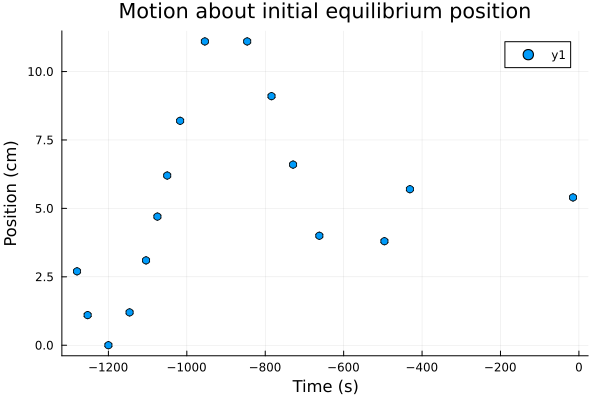

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [54]:
plot(scatter(t_eq, x_eq))
title!("Motion about initial equilibrium position")
xlabel!("Time (s)")
ylabel!("Position (cm)")

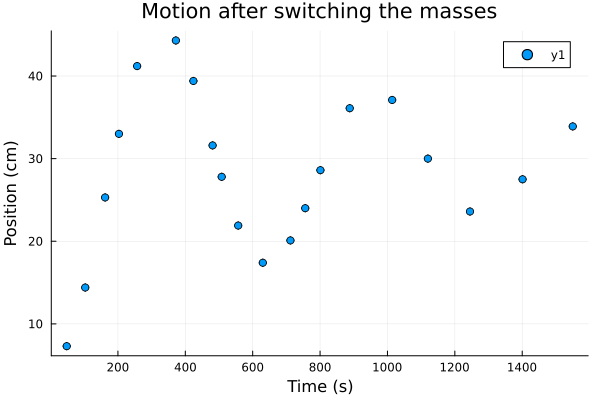

In [55]:
plot(scatter(t, x))
title!("Motion after switching the masses")
xlabel!("Time (s)")
ylabel!("Position (cm)")

In [242]:
@. model(x, p) = p[1] * exp( -p[2] * (x + abs(p[3])) ) * sin( p[4] * x + p[5] ) + p[6]

fit_eq = curve_fit(model, [m.val for m in t_eq], [m.val for m in x_eq], [5.5, 0.001, 1280, 0.012, 2.0, 5.0])
fit = curve_fit(model, [m.val for m in t], [m.val for m in x], [10.0, 0.001, -50, 0.012, -0.5, 28.0])

bestfit_eq(x) = model(x, coef(fit_eq))
bestfit(x) = model(x, coef(fit))

bestfit (generic function with 1 method)

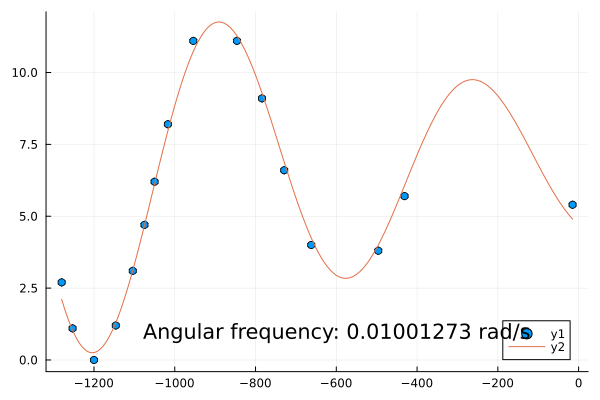

In [243]:
plt = plot(scatter(t_eq, x_eq))
plt = plot!(
    LinRange(minimum([m.val for m in t_eq]), maximum([m.val for m in t_eq]), 200),
    bestfit_eq.(LinRange(minimum([m.val for m in t_eq]), maximum([m.val for m in t_eq]), 200))
)

plt = annotate!(-600, 1.0, "Angular frequency: $(round(coef(fit_eq)[4], digits=8)) rad/s")

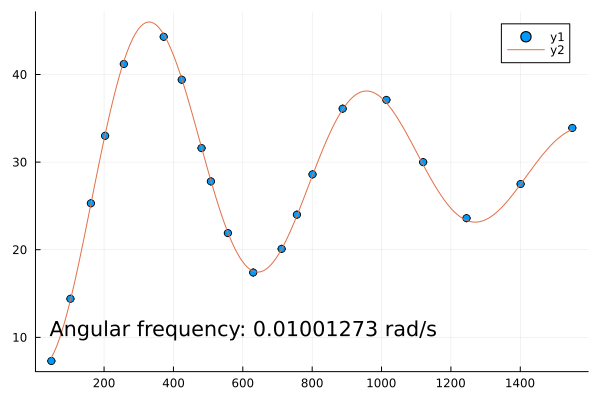

In [244]:
plt = plot(scatter(t, x))
plt = plot!(
    LinRange(minimum([m.val for m in t]), maximum([m.val for m in t]), 200),
    bestfit.(LinRange(minimum([m.val for m in t]), maximum([m.val for m in t]), 200))
)

plt = annotate!(600, 11.0, "Angular frequency: $(round(coef(fit_eq)[4], digits=8)) rad/s")

In [ ]:
#Idea for how to analyze this: Fit the motion of the system before changing the position of the masses, then
#pass the point at the moment of the mass switch as the first value in the second fit.

In [234]:
measurements = [1.0, 2.1, 3.4, 4.6, 6.4, 8.2, 12.3, 14.7, 16.6, 18.8, 20.9, 23.1, 25.3, 29.0, 31.1, 33.8, 35.0, 35.7, 34.8, 33.9, 31.7, 28.4, 25.8, 22.4, 20.1, 17.6, 15.6, 13.6, 12.2, 11.1, 15.4, 17.9, 21.7, 23.9, 26.3, 27.7]

measurement_dict = Dict(i => measurements[i] for i in 1:36);

In [235]:
x2 = Float64[]
t2 = Float64[]

for line in [
    "1. 3:26:05",
    "2. 3:26:21",
    "3. 3:26:35",
    "4. 3:26:47",
    "5. 3:27:01",
    "6. 3:27:13",
    "7. 3:27:39",
    "8. 3:27:53",
    "9. 3:28:04",
    "10. 3:28:17",
    "11. 3:28:29",
    "12. 3:28:43",
    "13. 3:28:57",
    "14. 3:29:22",
    "15. 3:29:39",
    "16. 3:30:07",
    "17. 3:30:28",
    "18. 3:31:05",
    "19. 3:31:36",
    "20. 3:31:52",
    "21. 3:32:17",
    "22. 3:32:48",
    "23. 3:33:10",
    "24. 3:33:37",
    "25. 3:33:56",
    "26. 3:34:18",
    "27. 3:34:38",
    "28. 3:35:01",
    "29. 3:35:25",
    "30. 3:36:03",
    "31. 3:37:46",
    "32. 3:38:18",
    "33. 3:38:59",
    "34. 3:39:25",
    "35. 3:39:59",
    "36. 3:40:26",
    "22. 3:40:46",
    "14. 3:41:35",
    "35. 3:42:48",
    "23. 3:42:59",
    "34. 3:43:28",
    "12. 3:43:44",
    "24. 3:43:54",
    "11. 3:44:17",
    "25. 3:44:30",
    "10. 3:44:53",
    "32. 3:45:09",
    "9. 3:45:48"
]
    index, time_str = split(line, ". ")
    time = Time(parse(Int, split(time_str, ":")[1]), parse(Int, split(time_str, ":")[2]), parse(Float64, split(time_str, ":")[3]))
    push!(x2, measurement_dict[parse(Int, index)])
    push!(t2, time_to_seconds(time))
end

x2 = [0.0; x2]
t2 = [time_to_seconds(Time(3, 25, 37)); t2]
t2 .-= time_to_seconds(Time(3, 25, 37));

In [236]:
x2 = [(m ± 0.05) for m in x2]
t2 = [(m ± 0.5) for m in t2];

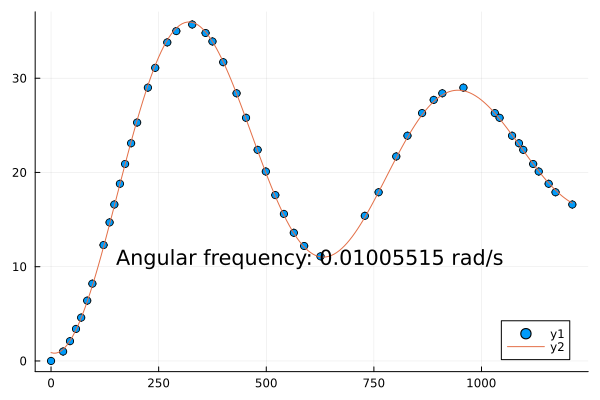

In [237]:
plt = plot(scatter(t2, x2))

fit2 = curve_fit(model, [m.val for m in t2], [m.val for m in x2], [10.0, 0.001, -50, 0.012, -0.5, 28.0])
bestfit2(x) = model(x, coef(fit2))

plt = plot!(LinRange(minimum([m.val for m in t2]), maximum([m.val for m in t2]), 200), bestfit2.(LinRange(minimum([m.val for m in t2]), maximum([m.val for m in t2]), 200)))
plt = annotate!(600, 11.0, "Angular frequency: $(round(coef(fit2)[4], digits=8)) rad/s")

In [239]:
println("Average angular frequency: $(round((coef(fit_eq)[4] + coef(fit2)[4]) / 2, digits=8)) rad/s")

Average angular frequency: 0.01003394 rad/s


In [241]:
println("Average period: $(round(2 * pi / ((coef(fit_eq)[4] + coef(fit2)[4]) / 2), digits=8)) s, = $(round(2 * pi / ((coef(fit_eq)[4] + coef(fit2)[4]) / 2) / 60, digits=8)) min")

Average period: 626.19309686 s, = 10.43655161 min
